<a href="https://colab.research.google.com/github/sabamontazeri/machine-learning-course/blob/main/HW4_AI(Random_forest).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')
Data=pd.read_csv('/content/LungCancer.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# @title droping datasb with 0 feature importance and 0 correlation with target
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OrdinalEncoder,LabelEncoder
Dataset=Data.drop(['index','Patient Id','Gender'],axis=1)
encoder=LabelEncoder()
Dataset['Level']=encoder.fit_transform(Dataset['Level'])


In [20]:
# @title spling train and test data
from sklearn.model_selection import train_test_split
X=Dataset.drop(['Level'],axis=1)
y=Dataset['Level']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42,shuffle=True)

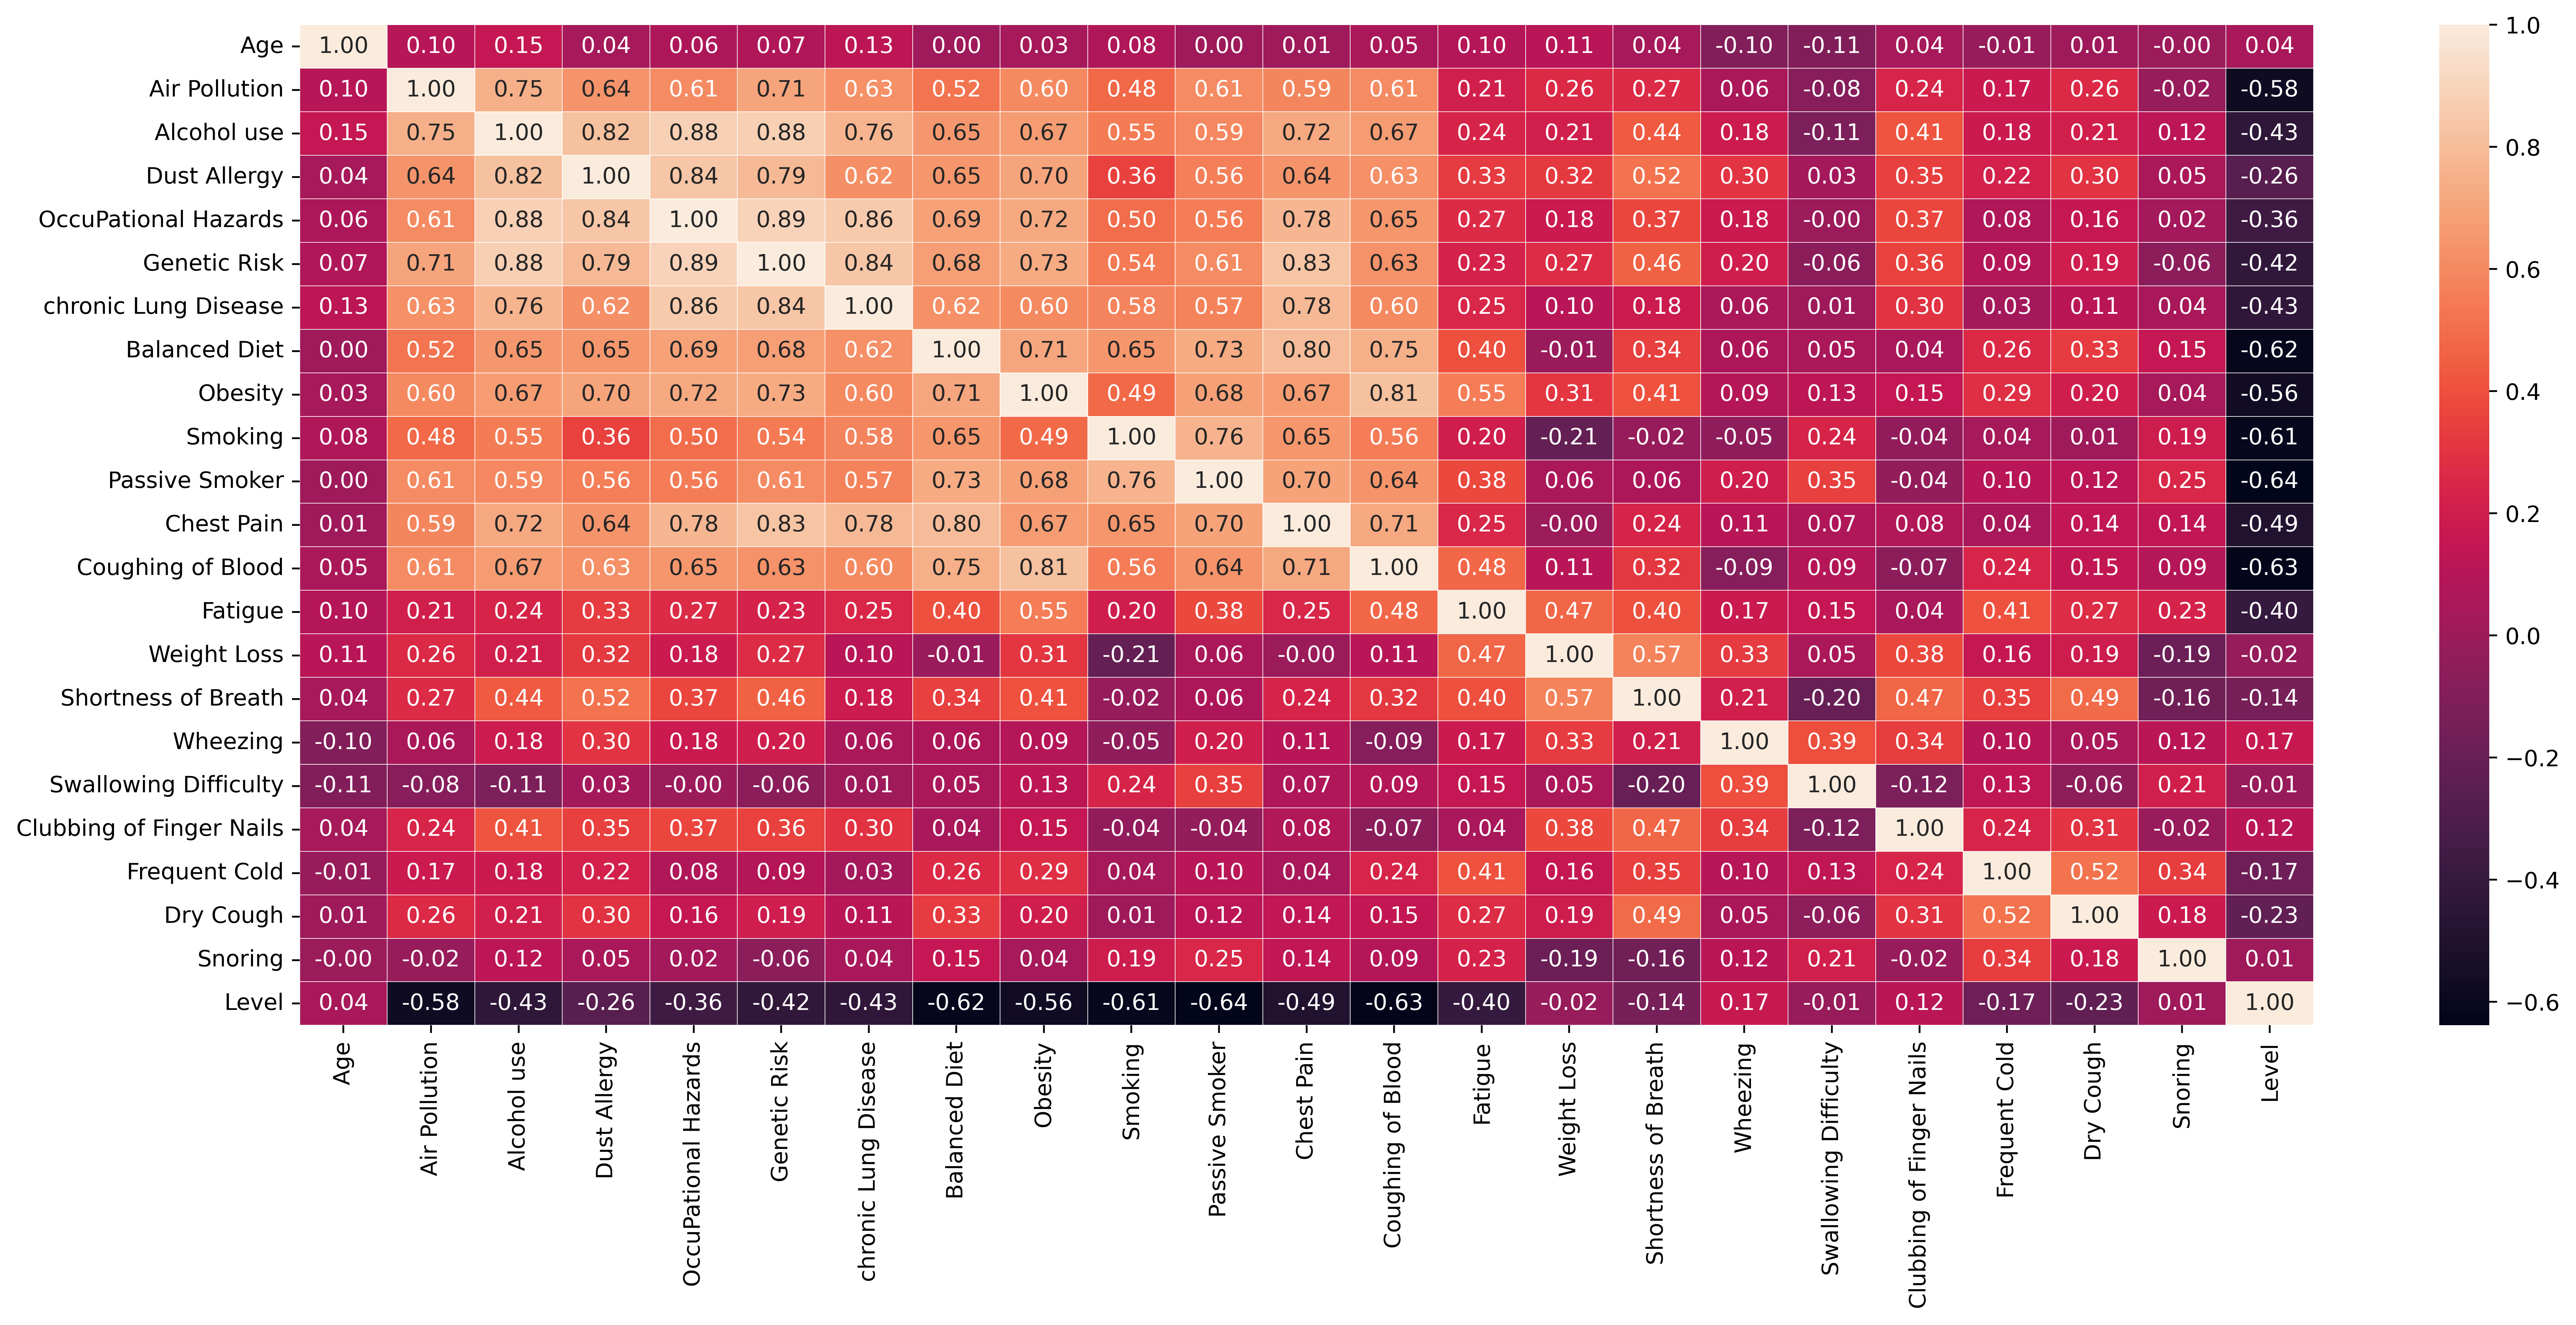

In [21]:
# @title heatcorrelation plot
## heatcorrelation plot for understanding importance of
import seaborn as sns
plt.figure(figsize=(20,8), dpi =500)
corr = Dataset.corr(method = 'pearson')
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.01)
plt.show()

In [22]:
# @title defining model
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

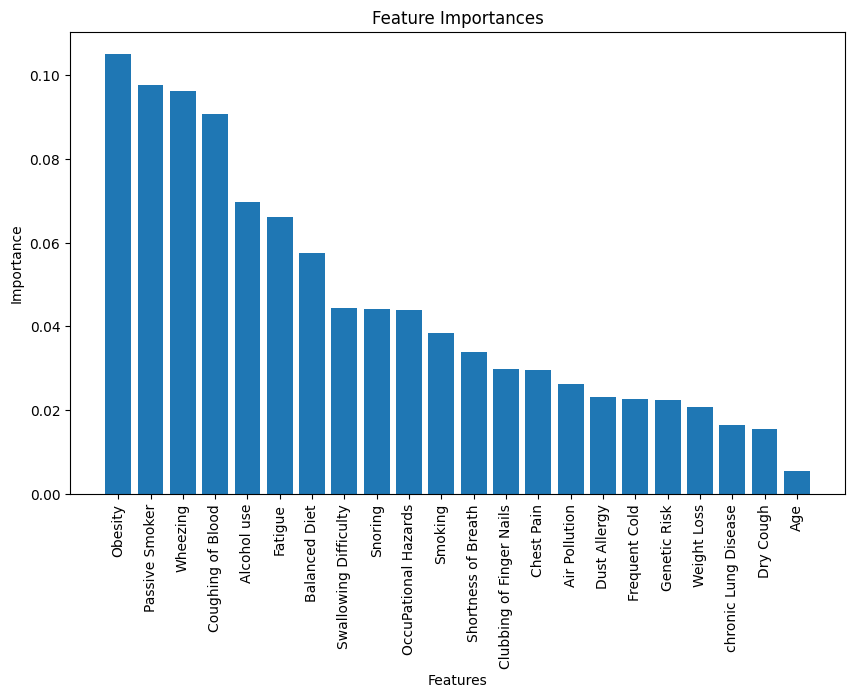

In [23]:
# @title Feature importance plots
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()
##we can also delete gender based on its

In [27]:
# @title Calculation of predictions for calculating accuracy
from sklearn.metrics import accuracy_score
y_pred_train=rf_clf.predict(X_train)
y_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


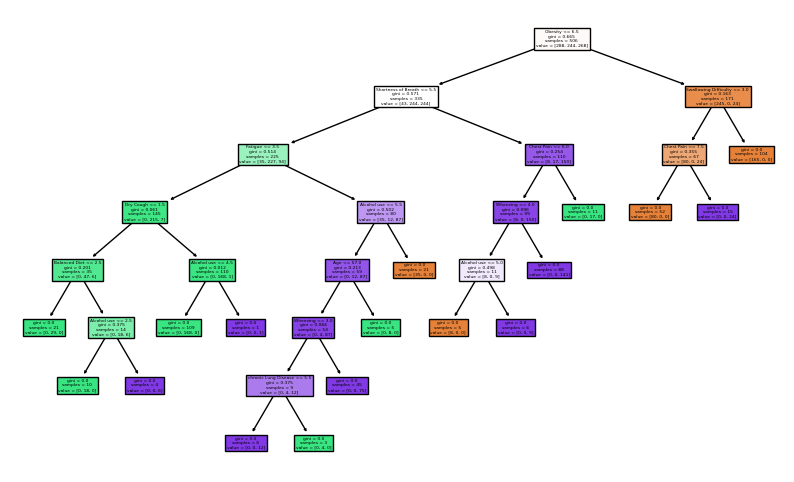

In [14]:
# @title Drawing estimator1 tree plot
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
estimator = rf_clf.estimators_[0]
fig, ax = plt.subplots(figsize=(10, 6))
plot_tree(estimator, feature_names=Dataset.columns, filled=True, ax=ax)
plt.show()

<ipython-input-16-ab101ec47530>:10: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


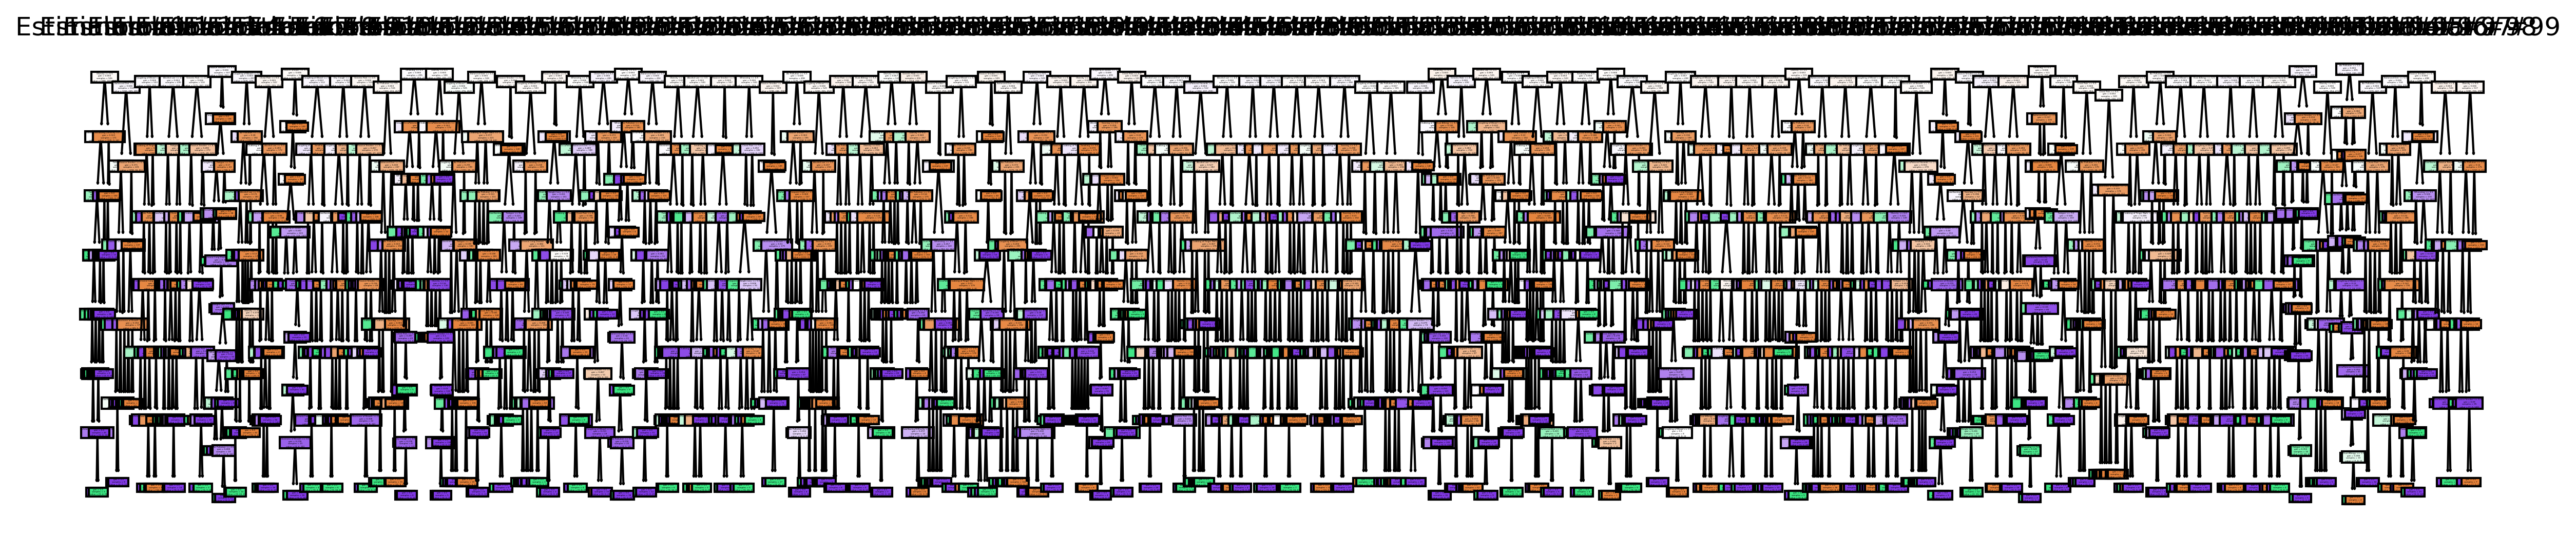

In [16]:
# @title Drawing each tree beside each other
# Plot each tree
n_trees = len(rf_clf.estimators_)
fig, axes = plt.subplots(nrows=1, ncols=n_trees, figsize=(20, 4), dpi=300)

for idx, estimator in enumerate(rf_clf.estimators_):
    ax = axes[idx]
    plot_tree(estimator, feature_names=Dataset.columns, filled=True, ax=ax)
    ax.set_title(f"Estimator #{idx}")

plt.tight_layout()
plt.show()

Cross Validation Scores:  1.0


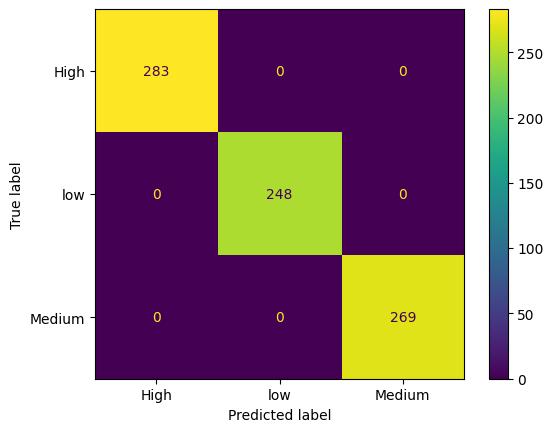

In [29]:
# @title evaluating model
##calculating cross validation score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
scores = cross_val_score(rf_clf, X_train, y_train.ravel(), cv =3,scoring="accuracy")
print("Cross Validation Scores: ", scores.mean())
## Drawing confusion matrix to see TP,TN,FP,FNs

confusion_matrix = metrics.confusion_matrix(y_train.ravel(), y_pred_train)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels=["High","low","Medium"] )

cm_display.plot()
plt.show()